In [1]:
# imports
from Helper import Helper
from DatabaseManager import DatabaseManager

In [2]:
# load database
dbManager = DatabaseManager()
helper = Helper(dbManager)

terminating database....
terminating database....
terminating database....
terminating database....


In [3]:
# checking the users table
print(dbManager.runCommand("SELECT COUNT(*) FROM users LIMIT 5;"))
# checking the games table
print(dbManager.runCommand("SELECT COUNT(*) FROM games LIMIT 1;"))
# checking the gameStats table
print(dbManager.runCommand("SELECT COUNT(*) FROM gameStats LIMIT 1;"))

terminating database....
[(43149,)]
terminating database....
[(44652,)]
terminating database....
[(44652,)]


In [ ]:
# populating the tables if needed
dbManager.populateUsersTable("../Data/Scraped_Files/")
dbManager.populateGamesTable("../Data/Scraped_Files/")
dbManager.populateGameStatsTable("../Data/Scraped_Files/")

In [4]:
users = dbManager.getDataFrame("SELECT * FROM users;")
games = dbManager.getDataFrame("SELECT * FROM games;")
gameStats = dbManager.getDataFrame("SELECT * FROM gameStats;")

22


<AxesSubplot: ylabel='Frequency'>

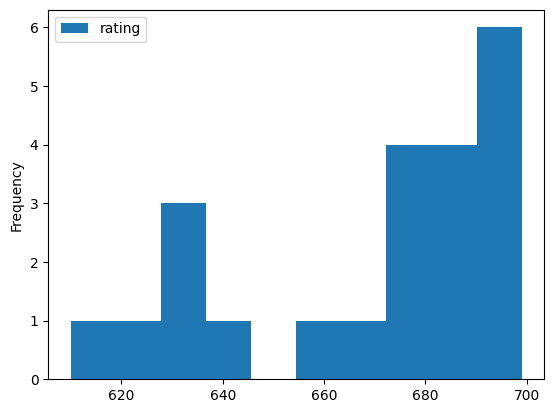

In [6]:
u = users[users['rating']<700]
print(len(u))
u.plot.hist()

<AxesSubplot: ylabel='Frequency'>

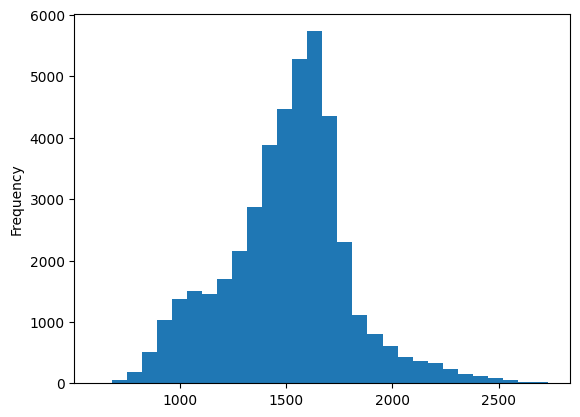

In [9]:
# check users distribution
users['rating'].plot.hist(bins=30)

In [11]:
# we need more users rated under 1700
beginners = users[users['rating']<1500]
advanced = users[users['rating']>2000]
intermediate = users[users['rating']>1500]
intermediate = intermediate[intermediate['rating']<2000]
print(len(beginners))
print(len(advanced))
print(len(intermediate))

19192
1975
21897


In [13]:
done = []
new_username_set = set()
for user in advanced['userid'].tolist():
    new_username = helper.scrape_n_rapid_games('../Data/Scraped_Files',user,50, True, True)
    new_username_set.union(new_username)
    done.append(user)

Added 30/50 to hossein_soltani
Added 10/50 to mohamed_sadki


In [ ]:
print(len(done))
for user in done:
    done.remove(user)
    users_under_1700.remove(user)

In [ ]:
import os
import json

path = "../Data/Scraped_Files"
gameId = None
to_be_deleted = []
for user in os.listdir(path):
    for game in os.listdir(f"{path}/{user}"):
        if os.path.getsize(f"{path}/{user}/{game}") == 0:
            os.remove(f"{path}/{user}/{game}")
        with open(f"{path}/{user}/{game}", "r") as f:
            g = json.load(f)
            gameId = g['id']
            for game2 in os.listdir(f"{path}/{user}"):
                if game == game2:
                    continue
                with open(f"{path}/{user}/{game2}", "r") as f2:
                    g2 = json.load(f2)
                    gameId2 = g2['id']
                    if gameId == gameId2:
                        if os.path.isfile(f"{path}/{user}/{game}"):
                            to_be_deleted.append(f"{path}/{user}/{game}")

In [ ]:
for filename in to_be_deleted:
    if filename[-7]==' ':
        print(filename)
        try:
            os.remove(filename)
        except:
            continue

In [ ]:
user